In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Load pickled data frame

In [2]:
df_csvfile = '../workdir/aloi/hmax_df.pickle'

In [3]:
df = pickle.load(open( df_csvfile, "rb" ))

In [4]:
#df.head()

In [5]:
# how many object categories are in this selection?
print(len(np.unique(df.category.values)))
# how many exemplars per category (i.e. rotations)
print(len(np.unique(df.exemplar.values)))

237
8


In [6]:
# z-standardize all typicality measures
for colname in ['ri_typicality', 'intact_typicality', 'conserved_typicality']:
    df['%s_z' % colname] = (df[colname] - np.mean(df[colname].values)) / np.std(df[colname].values)

In [7]:
def add_category_names(df, csv_filepath='../aloi_selection.csv'):

    # make df with category (as number) and category name
    db_df = pd.read_csv(csv_filepath, sep=';')
    db_df['category'] = db_df['db-number'].values
    db_df = db_df.drop(columns=['description', 'database', 'path', 'usedby', 'viewpoints', 'exemplars', 'db-number'])

    # transform df.category into string for both data framees
    df.category = df.category.astype('str')
    db_df.category = db_df.category.astype('str')

    # insert category_name into data frame with patterns
    for cat, catname in zip(db_df.category.values.tolist(), db_df.name.values.tolist()):
        df.loc[df['category'] == cat, 'category_name'] = catname

    # make data type categorical again for plotting
    df.category = df.category.astype('category')
    df.category_name = df.category_name.astype('category')
    
    return df

df = add_category_names(df)

In [8]:
df.head()

,category,exemplar,ri_pattern,intact_pattern,ri_typicality,intact_typicality,conserved_typicality,ri_typicality_z,intact_typicality_z,conserved_typicality_z,category_name
0,798,r225,"[0.4624589128697541, 0.5676057256788559, 0.566...","[0.7798654038796009, 0.8531508057833821, 0.861...",6.997132,6.927355,6.836960,-0.277075,-0.329378,-0.083846,isostar bottle
1,77,r225,"[0.4384783079807329, 0.4760773614256729, 0.518...","[0.8060298510002559, 0.857301095365741, 0.8963...",6.999730,6.931086,6.721486,0.900859,-0.213797,-2.111598,histor paint
2,925,r180,"[0.4494446489665954, 0.5280466942372747, 0.557...","[0.7437337707542392, 0.8013314013573001, 0.829...",6.999832,6.976707,6.847303,0.946967,1.199535,0.097789,football
3,62,r90,"[0.415666102437596, 0.5131738643359652, 0.5485...","[0.7498946843798088, 0.8139965558590907, 0.850...",6.999207,6.959101,6.894468,0.663481,0.654118,0.926009,yellow duck
4,291,r90,"[0.4867658386831864, 0.5586230933992825, 0.595...","[0.7297043489848755, 0.7805313261995606, 0.790...",6.999870,6.987722,6.921342,0.964331,1.540779,1.397934,tennis ball


In [9]:
def order_categories_by(df,
                        typicality_measure='conserved_typicality_z',
                        category_colname='category_name',
                        sort_func=np.mean):
    """
    Get an array of category names sorted by the average (or alternatively other function) of a given 
    typicality measure. Use this to control the category order in plots.
    """
    df_agg = df.groupby(category_colname).agg({typicality_measure:sort_func})
    df_sorted = df_agg.sort_values(by=[typicality_measure])
    ordered_categories = df_sorted.index.values
    ordered_categories = [line.decode('utf-8').strip() for line in ordered_categories]
    
    return ordered_categories

ordered_categories = order_categories_by(df)

# Conserved typicality

## Distribution

In [10]:
sns.set_context('talk')
sns.set_style('whitegrid')

/Users/Oliver/anaconda2/envs/run_hmax/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


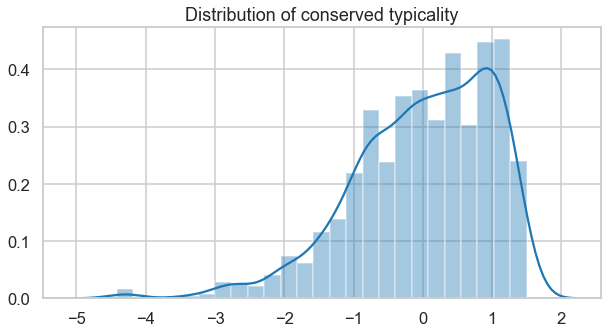

In [11]:
f, axis = plt.subplots(figsize=(10,5))
sns.distplot(df.conserved_typicality_z.values, rug=False, kde=True, ax=axis)
axis.set(title='Distribution of conserved typicality')
plt.show()

## Distribution (violin plot) for individual objects

In [12]:
sns.set_style('whitegrid', {'axes.grid': True, 'xtick.bottom': False, 'xtick.top': False, 'xtick.color': 'gray',
                            'ytick.left': True, 'ytick.right': True, 'ytick.color': 'gray'})

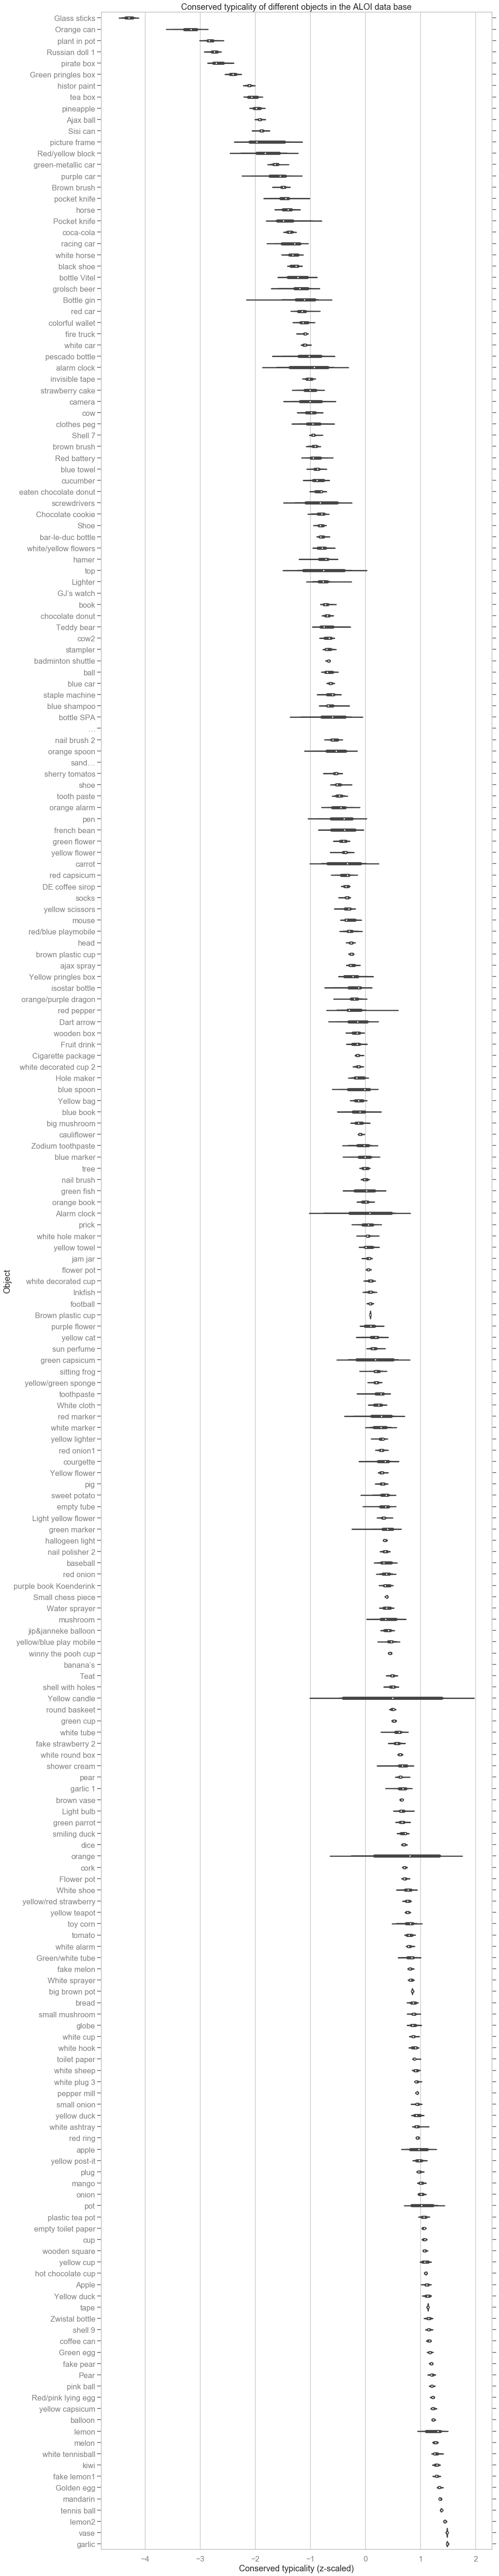

In [14]:
f, axis = plt.subplots(figsize=(15,100))

sns.violinplot(x="conserved_typicality_z", y="category_name", data=df, ax=axis,
               cut=True, order=ordered_categories)

axis.set(title='Conserved typicality of different objects in the ALOI data base',
         ylabel='Object', xlabel='Conserved typicality (z-scaled)')

plt.show()

# TODO: objects with names that are not unicode encoded are not displayed on the plot
#  (though the order should still be correct, since calculated based on the database-id)